# Voice classification in three types validation results

In [1]:
# sys.path.append('/content/gdrive/MyDrive/scatter_signal_typing')
import torch
from kymatio.torch import Scattering1D
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from utils import *
from VoicesDataset import VoicesDataset # A class for data loading.
import pickle

import decimal
from sklearn import svm
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
file_path = ''
with open(file_path + 'results_hp.pkl', 'rb') as f:
    max_acc_results = pickle.load(f)

y_val_meei_max, X_val_meei_max = max_acc_results['meei_val_set']
y_val_saar_max, X_val_saar_max = max_acc_results['saar_val_set']

In [3]:
X_val = np.concatenate((X_val_meei_max, X_val_saar_max), axis=0)
y_val = np.concatenate((y_val_meei_max, y_val_saar_max), axis=0)
acc_val, results_general = val_fun(X_val, y_val)
acc_meei, results_meei, acc_cross_saar = val_fun(X_val_meei_max, y_val_meei_max, X_val_saar_max, y_val_saar_max)
acc_saar, results_saar, acc_cross_meei = val_fun(X_val_saar_max, y_val_saar_max, X_val_meei_max, y_val_meei_max)

# Save results in .csv files.
file_path = 'figures/confusion_matrices/'
results_general.to_csv(file_path + 'results_general.csv')
results_meei.to_csv(file_path + 'results_meei.csv')
results_saar.to_csv(file_path + 'results_saar.csv')

print('Overall Accuracy: {}'.format(acc_val))
print('Overall Accuracy MEEI: {}'.format(acc_meei))
print('Overall Accuracy Cross-SAAR: {}'.format(acc_cross_saar))
print('Overall Accuracy SAAR: {}'.format(acc_saar))
print('Overall Accuracy Cross-MEEI: {}'.format(acc_cross_meei))

Overall Accuracy: 0.8206336633663367
Overall Accuracy MEEI: 0.8381598793363499
Overall Accuracy Cross-SAAR: 0.8336734693877551
Overall Accuracy SAAR: 0.8551020408163266
Overall Accuracy Cross-MEEI: 0.8290944123314066


In [4]:
def figure_conf_matrix(cm, sdm, title, size_inches = (3.5,3.5), file_path = None):
  # If you enter file_path, the image is saved there.

  group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()]

  group_percentages2 = ["{0:.2%}".format(value) for value in sdm.flatten()]

  labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_percentages, group_percentages2)]
  labels = np.asarray(labels).reshape(3,3)
  

  fig = plt.figure()
  disp = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',
                     cbar= False, annot_kws={"size": 14})
  disp.xaxis.set_ticklabels(['Type 1', 'Type 2', 'Type 3'],
                            fontsize = 13, horizontalalignment='center')
  disp.yaxis.set_ticklabels(['Type 1', 'Type 2', 'Type 3'],
                            fontsize = 13, verticalalignment='center')
  disp.set_xlabel('Predicted Class', fontsize = 13)
  disp.xaxis.set_label_position('top') 
  disp.xaxis.tick_top()
  disp.set_ylabel('True class', fontsize = 13)
  fig.set_size_inches(size_inches)
  if file_path is not None:
    plt.title(title, fontsize = 15)
    plt.savefig(filename +'.pdf',bbox_inches='tight')# , format='svg')

Overall Accuracy = 82.06336633663366 (2.9744367192271195)


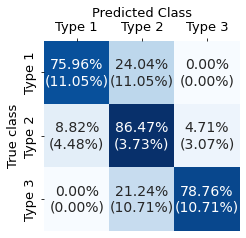

In [5]:
acc = results_general['Acc'].to_numpy()
print('Overall Accuracy = {} ({})'.format(np.mean(acc)*100,np.std(acc)*100))

cm = results_general.loc[:,'cm_0':'cm_8'].to_numpy()
sdcm = np.std(cm,axis = 0)
cm = np.mean(cm,axis = 0)

cm = cm.reshape((3,3))
title = 'Train and Test: MEEI + SVD'
figure_conf_matrix(cm, sdcm, title)

MEEI Accuracy = 83.815987933635 (4.951564779145223)
Cross SAAR Accuracy = 83.36734693877551 (0.45861642967845284)


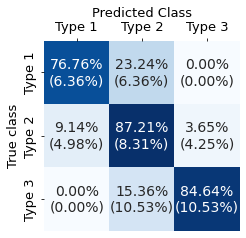

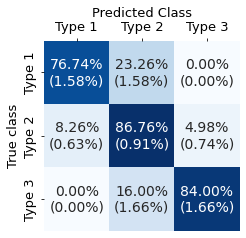

In [6]:
acc = results_meei['Acc'].to_numpy()
print('MEEI Accuracy = {} ({})'.format(np.mean(acc)*100,np.std(acc)*100))
acc_cross = results_meei['Acc_Cross.'].to_numpy()
print('Cross SAAR Accuracy = {} ({})'.format(np.mean(acc_cross)*100,np.std(acc_cross)*100))

cm = results_meei.loc[:,'cm_0':'cm_8'].to_numpy()
sdcm = np.std(cm,axis = 0)
cm = np.mean(cm,axis = 0)
cm = cm.reshape((3,3))
title = 'Train: MEEI - Test: MEEI'
figure_conf_matrix(cm, sdcm, title)

cm = results_meei.loc[:,'cm_cross0':'cm_cross8'].to_numpy()
sdcm = np.std(cm,axis = 0)
cm = np.mean(cm,axis = 0)
cm = cm.reshape((3,3))
title = 'Train: MEEI - Test: SVD'
figure_conf_matrix(cm, sdcm, title)

SAAR Accuracy = 85.51020408163265 (3.92028014536705)
Cross MEEI Accuracy = 82.90944123314065 (0.47235648062162766)


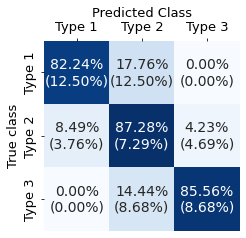

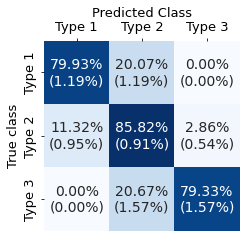

In [7]:
acc = results_saar['Acc'].to_numpy()
print('SAAR Accuracy = {} ({})'.format(np.mean(acc)*100,np.std(acc)*100))
acc_cross = results_saar['Acc_Cross.'].to_numpy()
print('Cross MEEI Accuracy = {} ({})'.format(np.mean(acc_cross)*100,np.std(acc_cross)*100))


cm = results_saar.loc[:,'cm_0':'cm_8'].to_numpy()
sdcm = np.std(cm,axis = 0)
cm = np.mean(cm,axis = 0)
cm = cm.reshape((3,3))
# filename = file_path + 'cm_results_saar'
title = 'Train: SVD - Test: SVD'
figure_conf_matrix(cm, sdcm, title)

cm = results_saar.loc[:,'cm_cross0':'cm_cross8'].to_numpy()
sdcm = np.std(cm,axis = 0)
cm = np.mean(cm,axis = 0)
cm = cm.reshape((3,3))
title = 'Train: SVD - Test: MEEI'
figure_conf_matrix(cm, sdcm, title)